In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("gpascore.csv")

In [3]:
df.head()

,admit,gre,gpa,rank
0,0,380.0,3.21,3
1,1,660.0,3.67,3
2,1,800.0,4.00,1
3,1,640.0,3.19,4
4,0,520.0,2.33,4


In [4]:
df.tail()

,admit,gre,gpa,rank
421,1,750.0,3.44,4
422,1,710.0,3.66,4
423,0,450.0,3.25,4
424,1,760.0,3.76,2
425,1,710.0,3.82,3


In [5]:
df.isnull().sum()

admit    0
gre      1
gpa      0
rank     0
dtype: int64

In [6]:
df= df.dropna()

In [7]:
df.isnull().sum()

admit    0
gre      0
gpa      0
rank     0
dtype: int64

In [8]:
df['gre'].max()

800.0

In [9]:
df = df - np.min(df, axis=0) 
df = df / np.max(df, axis=0)

In [10]:
print(df)

     admit       gre       gpa      rank
0      0.0  0.275862  0.579787  0.666667
1      1.0  0.758621  0.824468  0.666667
2      1.0  1.000000  1.000000  0.000000
3      1.0  0.724138  0.569149  1.000000
4      0.0  0.517241  0.111702  1.000000
..     ...       ...       ...       ...
421    1.0  0.913793  0.702128  1.000000
422    1.0  0.844828  0.819149  1.000000
423    0.0  0.396552  0.601064  1.000000
424    1.0  0.931034  0.872340  0.333333
425    1.0  0.844828  0.904255  0.666667

[425 rows x 4 columns]


In [11]:
y = df['admit'].values
y[0:5]

array([0., 1., 1., 1., 0.])

In [12]:
x = []
for i, rows in df.iterrows():
    x.append([rows['gre'], rows['gpa'], rows['rank']])

In [25]:
# print(x)

In [17]:
x_train = x[:int(len(x) * 0.8)] #  # 전체 데이터 중에서 80%만큼 앞의 데이터 저장
y_train = y[:int(len(y) * 0.8)]
x_test = x[int(len(x)* 0.8):] # 전체 데이터 중에서 20%만큼 뒤의 데이터 저장
y_test = y[int(len(y)*0.8):] 

In [18]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(3,activation = 'relu' ),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid'),
    
])

In [19]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [20]:
history = model.fit(np.array(x_train), np.array(y_train), epochs = 20,
                   validation_data=(np.array(x_test), np.array(y_test)))

Epoch 1/20
11/11 [==============================] - 1s 28ms/step - loss: 0.6909 - accuracy: 0.6029 - val_loss: 0.6854 - val_accuracy: 0.6235
Epoch 2/20
11/11 [==============================] - 0s 3ms/step - loss: 0.6850 - accuracy: 0.6088 - val_loss: 0.6781 - val_accuracy: 0.5765
Epoch 3/20
11/11 [==============================] - 0s 3ms/step - loss: 0.6796 - accuracy: 0.6059 - val_loss: 0.6725 - val_accuracy: 0.6118
Epoch 4/20
11/11 [==============================] - 0s 3ms/step - loss: 0.6736 - accuracy: 0.6676 - val_loss: 0.6675 - val_accuracy: 0.6824
Epoch 5/20
11/11 [==============================] - 0s 3ms/step - loss: 0.6679 - accuracy: 0.7118 - val_loss: 0.6639 - val_accuracy: 0.7647
Epoch 6/20
11/11 [==============================] - 0s 3ms/step - loss: 0.6604 - accuracy: 0.7559 - val_loss: 0.6575 - val_accuracy: 0.7529
Epoch 7/20
11/11 [==============================] - 0s 3ms/step - loss: 0.6521 - accuracy: 0.7529 - val_loss: 0.6485 - val_accuracy: 0.7765
Epoch 8/20
11/11 [=

In [21]:
# model.predict([[750,3.2,3],[500,3.8,1]])
model.predict(x_test)

array([[0.23731071],
       [0.42354694],
       [0.40749246],
       [0.35587835],
       [0.26448107],
       [0.5057236 ],
       [0.77413595],
       [0.30595428],
       [0.3941997 ],
       [0.8160178 ],
       [0.4797953 ],
       [0.35780832],
       [0.6529759 ],
       [0.557157  ],
       [0.5930816 ],
       [0.5369498 ],
       [0.6827873 ],
       [0.48575374],
       [0.7097428 ],
       [0.65405774],
       [0.548042  ],
       [0.5344688 ],
       [0.38290945],
       [0.5344935 ],
       [0.20356837],
       [0.21400851],
       [0.5335203 ],
       [0.70986843],
       [0.81054205],
       [0.55450124],
       [0.62947226],
       [0.40932283],
       [0.5998349 ],
       [0.5780826 ],
       [0.36650556],
       [0.60093784],
       [0.82794523],
       [0.4184686 ],
       [0.28248796],
       [0.6839514 ],
       [0.67701995],
       [0.48480105],
       [0.7747107 ],
       [0.21880758],
       [0.30481312],
       [0.7628637 ],
       [0.48709714],
       [0.499

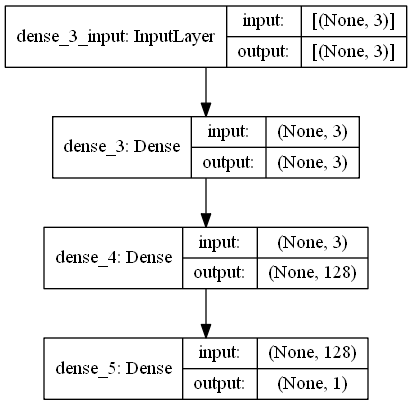

In [22]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 3)                 12        
_________________________________________________________________
dense_4 (Dense)              (None, 128)               512       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 129       
Total params: 653
Trainable params: 653
Non-trainable params: 0
_________________________________________________________________


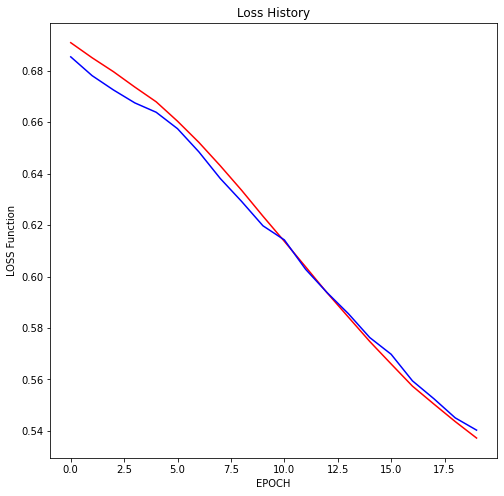

In [24]:
train_history = history.history["loss"]
validation_history = history.history["val_loss"]
fig = plt.figure(figsize=(8, 8))
plt.title("Loss History")
plt.xlabel("EPOCH")
plt.ylabel("LOSS Function")
plt.plot(train_history, "red")
plt.plot(validation_history, 'blue')
plt.show()